In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = ('C:/Users/shahe/Desktop/Lung Cancer X-rays/train/')
TEST_DIR = ('C:/Users/shahe/Desktop/Lung Cancer X-rays/test/')
VAL_DIR = ('C:/Users/shahe/Desktop/Lung Cancer X-rays/valid/')

In [4]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 2 # We are aware of it.

In [5]:
import os
CLASSES = os.listdir(TRAIN_DIR)
NUM_CLASSES = len(CLASSES)
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'] 
 and the length is : 4


In [6]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 613 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
test_set = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 315 images belonging to 4 classes.


In [10]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [13]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
20/20 [==============================] - 267s 13s/step - loss: 1.2689 - acc: 0.5003 - val_loss: 0.9765 - val_acc: 0.5079
Epoch 2/10
20/20 [==============================] - 247s 12s/step - loss: 0.6173 - acc: 0.7354 - val_loss: 0.8967 - val_acc: 0.6317
Epoch 3/10
20/20 [==============================] - 250s 12s/step - loss: 0.4001 - acc: 0.8573 - val_loss: 0.8148 - val_acc: 0.6095
Epoch 4/10
20/20 [==============================] - 248s 12s/step - loss: 0.3304 - acc: 0.8904 - val_loss: 0.5848 - val_acc: 0.7429
Epoch 5/10
20/20 [==============================] - 254s 13s/step - loss: 0.2896 - acc: 0.9121 - val_loss: 0.6870 - val_acc: 0.7206
Epoch 6/10
20/20 [==============================] - 252s 13s/step - loss: 0.2169 - acc: 0.9515 - val_loss: 0.7171 - val_acc: 0.7175
Epoch 7/10
20/20 [==============================] - 262s 13s/step - loss: 0.1936 - acc: 0.9562 - val_loss: 0.7037 

In [17]:
adeno = image.load_img("C:/Users/shahe/Desktop/Lung Cancer X-rays/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000015 (4).png", target_size = (224, 224))
carcinoma = image.load_img("C:/Users/shahe/Desktop/Lung Cancer X-rays/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000066.png", target_size = (224, 224))
normal = image.load_img("C:/Users/shahe/Desktop/Lung Cancer X-rays/valid/normal/4 (2).png", target_size = (224, 224))
squamous = image.load_img("C:/Users/shahe/Desktop/Lung Cancer X-rays/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000046 (6).png", target_size = (224, 224))

In [18]:
#['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 
#'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 
#'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    print(result)
    results = np.argmax(np.array(result))
    
    if result[0][0] > 0e+0: results = 'adeno'
    elif result[0][1] > 0e+0: results = 'carcinoma'
    elif result[0][2] > 0e+0: results = 'normal'
    else: results = 'squamous'
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, results))
    

[[6.766264e-30 0.000000e+00 1.000000e+00 0.000000e+00]]
[[0.         0.00347812 0.99652195 0.        ]]
[[0. 0. 1. 0.]]
[[0. 0. 1. 0.]]


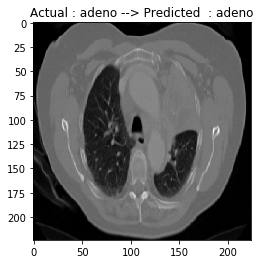

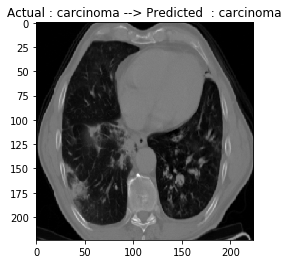

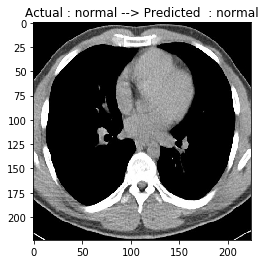

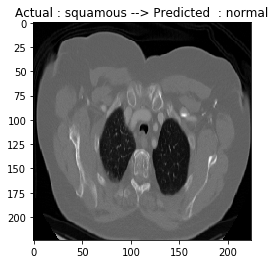

In [19]:
model_predict(adeno, "adeno")
model_predict(carcinoma, "carcinoma")
model_predict(normal, "normal")
model_predict(squamous, "squamous")

In [20]:
model.save("Lung Cancer Detection.h5")